In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import htext
import matplotlib as mpl

In [3]:
#Set general use colors
background = "#463F3A"
text_color = 'w'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [4]:
#read in the data
data = pd.read_csv('sevillah.csv')

#convert the data for the pitch size
data['x'] = data['x']*1.04
data['y'] = data['y']*.68
data['endX'] = data['endX']*1.04
data['endY'] = data['endY']*.68

#player id's from whoscored data
messi = 11119
riqui = 372827
fati = 382234
griezmann = 80241
coutinho = 80767
pedri = 402197
araujo = 384711
dest = 379205
barca = 65

#create a new data frame just for a certain player. If you want the whole team use the barca variable
r_data = data[data["playerId"]==coutinho]
r_data

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/12/value,qualifiers/13/type/value,qualifiers/13/type/displayName,isGoal,qualifiers/11/value,satisfiedEventsTypes/13,satisfiedEventsTypes/14,satisfiedEventsTypes/15,cardType/value,cardType/displayName
24,2219390997,14,1,2.0,65,60.320,44.064,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2219393167,42,3,43.0,65,4.576,30.192,3,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2219394159,55,5,2.0,65,75.608,50.592,5,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,2219396817,77,8,59.0,65,55.328,63.240,8,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,2219396849,79,9,4.0,65,66.664,54.060,9,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,2219396915,81,9,10.0,65,92.040,38.556,9,1,FirstHalf,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
216,2219398813,93,12,3.0,65,54.288,45.696,12,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2219399505,102,13,0.0,65,65.416,54.060,13,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,2219399537,104,13,2.0,65,62.608,62.016,13,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,2219399635,107,13,12.0,65,72.176,48.484,13,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def draw_field():# setting plot and pitch parameters, as well as style settings
    plt.axis('Off')

    # Plotting pitches using Peter McKeever's pitch dimensions 
    ly1 = [0,0,68,68,0]
    lx1 = [0,104,104,0,0]
    plt.plot(lx1,ly1,color="xkcd:off white",zorder=5, linewidth=2)

    ly2 = [13.84,13.84,54.16,54.16] 
    lx2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color="xkcd:off white",zorder=5, linewidth=2)

    ly3 = [13.84,13.84,54.16,54.16] 
    lx3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color="xkcd:off white",zorder=5, linewidth=2)  

    ly4 = [30.34,30.34,37.66,37.66]
    lx4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color="xkcd:off white",zorder=5, linewidth=2)

    ly5 = [30.34,30.34,37.66,37.66]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="xkcd:off white",zorder=5, linewidth=2)

    ly6 = [24.84,24.84,43.16,43.16]
    lx6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color="xkcd:off white",zorder=5, linewidth=2)

    ly7 = [24.84,24.84,43.16,43.16]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="xkcd:off white",zorder=5, linewidth=2)

    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="xkcd:off white", fill=False, zorder=2,alpha=1)

    rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
    rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
    rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

    vcy5 = [0,68] 
    vcx5 = [52,52]
    plt.plot(vcx5,vcy5,color="xkcd:off white",zorder=5, linewidth=2)

    plt.scatter(93,34,color="xkcd:off white",zorder=5, s=40)
    plt.scatter(11,34,color="xkcd:off white",zorder=5, s=40)
    plt.scatter(52,34,color="xkcd:off white",zorder=5, s=40)

    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)


In [51]:
'''
Here you create a new dataframe and set it up for easier use
'''
names = ['x pass','y pass','endX','endY','x shot','y shot','outcome']

passes = r_data.loc[r_data['type/displayName'] == 'Pass'] # select rows based on condition
shots = r_data.loc[r_data['isShot'] == True]

xpass = passes['x'].values #df -> np.array
ypass = passes['y'].values
endX = passes['endX'].values
endY = passes['endY'].values
xshot = shots['x'].values
yshot = shots['y'].values
outcome = passes['outcomeType/displayName'].values
    
df = pd.DataFrame(data=[xpass,ypass,endX,endY,xshot,yshot,outcome],index=names)
df = df.T
#df['x shot'] = df['x shot'].fillna(0)
#df['y shot'] = df['y shot'].fillna(0)

#If you want to calculate the success rate of passes
successes = len(df[df['outcome']=='Successful'])
successrate = successes/len(df['outcome'])
successrate = "{:.0%}". format(successrate)
successrate

'83%'

Text(0.13, 0.1, '@mckayjohns / Twitter')

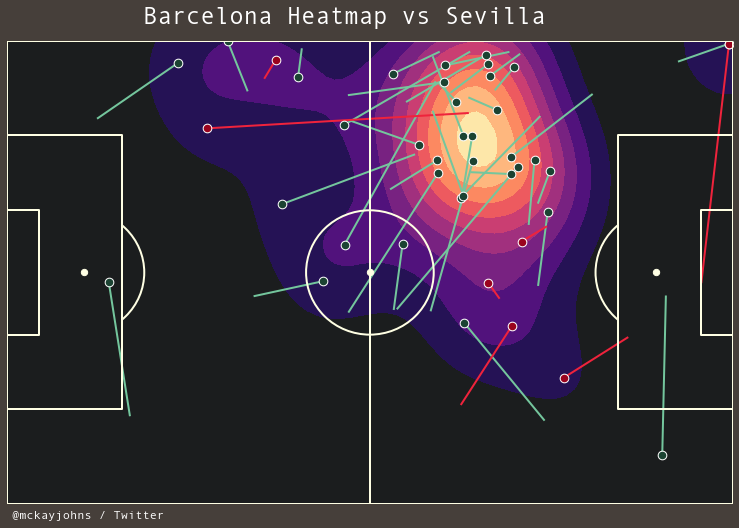

In [70]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#Seaborn kde plot. (Heatmap)
kde = sns.kdeplot(
            df['x pass'],
            df['y pass'],
            
            shade=True,
            cmap = 'magma',
            shade_lowest=False,
            zorder = 2
            )


#Call the draw field funciton
draw_field()

#plot the passes
for x in range(len(df['x pass'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x pass'][x],df['endX'][x]),(df['y pass'][x],df['endY'][x]), color='#74c69d',label='Pass Locations',lw=2,zorder=2)
        plt.scatter(df['x pass'][x],df['y pass'][x], color='#1b4332',label='Pass Locations',s=75,zorder=3,edgecolors='w')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x pass'][x],df['endX'][x]),(df['y pass'][x],df['endY'][x]), color='#ef233c',label='Pass Locations',lw=2,zorder=2)
        plt.scatter(df['x pass'][x],df['y pass'][x], color='#9a031e',label='Pass Locations',s=75,zorder=3,edgecolors='w')


#Highlight Title
s = f"Barcelona Heatmap vs Sevilla" 
htext.fig_htext(s,
                x=.27,y=.9,
                fontfamily='Andale Mono',
                highlight_weights=['bold'],
                string_weight='bold',
                fontsize=24,
                color=text_color,
                #highlight_colors=['#74c69d','#ef233c'],
               )



plt.axis('off')

plt.ylim(0, 68)
plt.xlim(0, 104)

#add credentials
fig.text(.13,.1,'@mckayjohns / Twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)
#fig.text(.13,.17,f'\n{successrate} success rate',fontstyle='italic',fontsize=16,fontfamily='Andale Mono',color=text_color)
#fig.text(.13,.14,f"Came on in 75'",fontstyle='italic',fontsize=16,fontfamily='Andale Mono',color=text_color)
